# Feature Engineering

## 1. Importing Cleaned Data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("clean_data.csv")

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 106159 entries, 0 to 106158
Data columns (total 59 columns):
 #   Column                              Non-Null Count   Dtype  
---  ------                              --------------   -----  
 0   EstimatedEffectiveYield             106159 non-null  float64
 1   EstimatedLoss                       106159 non-null  float64
 2   EstimatedReturn                     106159 non-null  float64
 3   ProsperRating (numeric)             106159 non-null  float64
 4   ProsperScore                        106159 non-null  float64
 5   Term                                106159 non-null  int64  
 6   LoanStatus                          106159 non-null  object 
 7   BorrowerRate                        106159 non-null  float64
 8   LenderYield                         106159 non-null  float64
 9   ProsperRating (Alpha)               106159 non-null  object 
 10  ListingCategory (numeric)           106159 non-null  int64  
 11  IsBorrowerHomeowner       

In [4]:
df.head()

,EstimatedEffectiveYield,EstimatedLoss,EstimatedReturn,ProsperRating (numeric),ProsperScore,Term,LoanStatus,BorrowerRate,LenderYield,ProsperRating (Alpha),...,OpenCreditLines,AmountDelinquent,PublicRecordsLast12Months,RevolvingCreditBalance,BankcardUtilization,AvailableBankcardCredit,TotalTrades,TradesNeverDelinquent (percentage),TradesOpenedLast6Months,DebtToIncomeRatio
0,0.168661,0.080306,0.096068,4.072243,5.950067,36,Completed,0.1580,0.1380,Missing,...,4.000000,472.000000,0.000000,0.000000,0.000000,1500.000000,11.000000,0.810000,0.000000,0.17
1,0.079600,0.024900,0.054700,6.000000,7.000000,36,Current,0.0920,0.0820,A,...,14.000000,0.000000,0.000000,3989.000000,0.210000,10266.000000,29.000000,1.000000,2.000000,0.18
2,0.168661,0.080306,0.096068,4.072243,5.950067,36,Completed,0.2750,0.2400,Missing,...,9.260164,984.507059,0.015094,17598.706751,0.561309,11210.225447,23.230034,0.885897,0.802327,0.06
3,0.084900,0.024900,0.060000,6.000000,9.000000,36,Current,0.0974,0.0874,A,...,5.000000,10056.000000,0.000000,1444.000000,0.040000,30754.000000,26.000000,0.760000,0.000000,0.15
4,0.183160,0.092500,0.090660,3.000000,4.000000,36,Current,0.2085,0.1985,D,...,19.000000,0.000000,0.000000,6193.000000,0.810000,695.000000,39.000000,0.950000,2.000000,0.26


## 2. Categorical/Label Encoding

In [5]:
df['LoanStatus']=(df['LoanStatus']=='Completed').astype(int)

In [6]:
target=df['LoanStatus']

In [7]:
categorical_columns = df.select_dtypes(include=["object"]).columns.values
category_columns=df[categorical_columns]

In [8]:
#one hot encoding
from sklearn.preprocessing import OneHotEncoder
ohe = OneHotEncoder(drop='first')
enc=ohe.fit_transform(category_columns[['BorrowerState','Occupation','EmploymentStatus']]).toarray()

In [9]:
Nominal_encoding=pd.DataFrame(enc)

In [10]:
#ordinal encoding
from sklearn.preprocessing import OrdinalEncoder
oe=OrdinalEncoder(categories=[['Missing','HR','E','D','C','B','A','AA'],['Not displayed','$0','Not employed','$1-24,999','$75,000-99,999','$100,000+','$50,000-74,999','$25,000-49,999']])
oe.fit(category_columns[['ProsperRating (Alpha)','IncomeRange']])

OrdinalEncoder(categories=[['Missing', 'HR', 'E', 'D', 'C', 'B', 'A', 'AA'],
                           ['Not displayed', '$0', 'Not employed', '$1-24,999',
                            '$75,000-99,999', '$100,000+', '$50,000-74,999',
                            '$25,000-49,999']])

In [11]:
Ordinal_encoding=pd.DataFrame(oe.transform(category_columns[['ProsperRating (Alpha)','IncomeRange']]))

In [12]:
total_categorical_frame = pd.DataFrame(np.hstack((Nominal_encoding.values,Ordinal_encoding.values)))

In [13]:
numerical_columns = df.select_dtypes(exclude=["object"]).columns.values
total_numerical_frame=df[numerical_columns]

In [14]:
total_numerical_frame.drop('LoanStatus',axis=1,inplace=True)
total_numerical_frame['IsBorrowerHomeowner'] = (total_numerical_frame['IsBorrowerHomeowner']==True).astype(int)
total_numerical_frame['CurrentlyInGroup'] = (total_numerical_frame['CurrentlyInGroup']==True).astype(int)
total_numerical_frame['IncomeVerifiable'] = (total_numerical_frame['IncomeVerifiable']==True).astype(int)

c:\users\atharv\appdata\local\programs\python\python39\lib\site-packages\pandas\core\frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(
<ipython-input-14-61ce471fb403>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  total_numerical_frame['IsBorrowerHomeowner'] = (total_numerical_frame['IsBorrowerHomeowner']==True).astype(int)
<ipython-input-14-61ce471fb403>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the do

In [15]:
data_ready_for_scaling=pd.DataFrame(np.hstack((total_numerical_frame.values,total_categorical_frame.values)))

In [16]:
df.drop('LoanStatus',axis=1,inplace= True)
X=df
y=target

<AxesSubplot:>

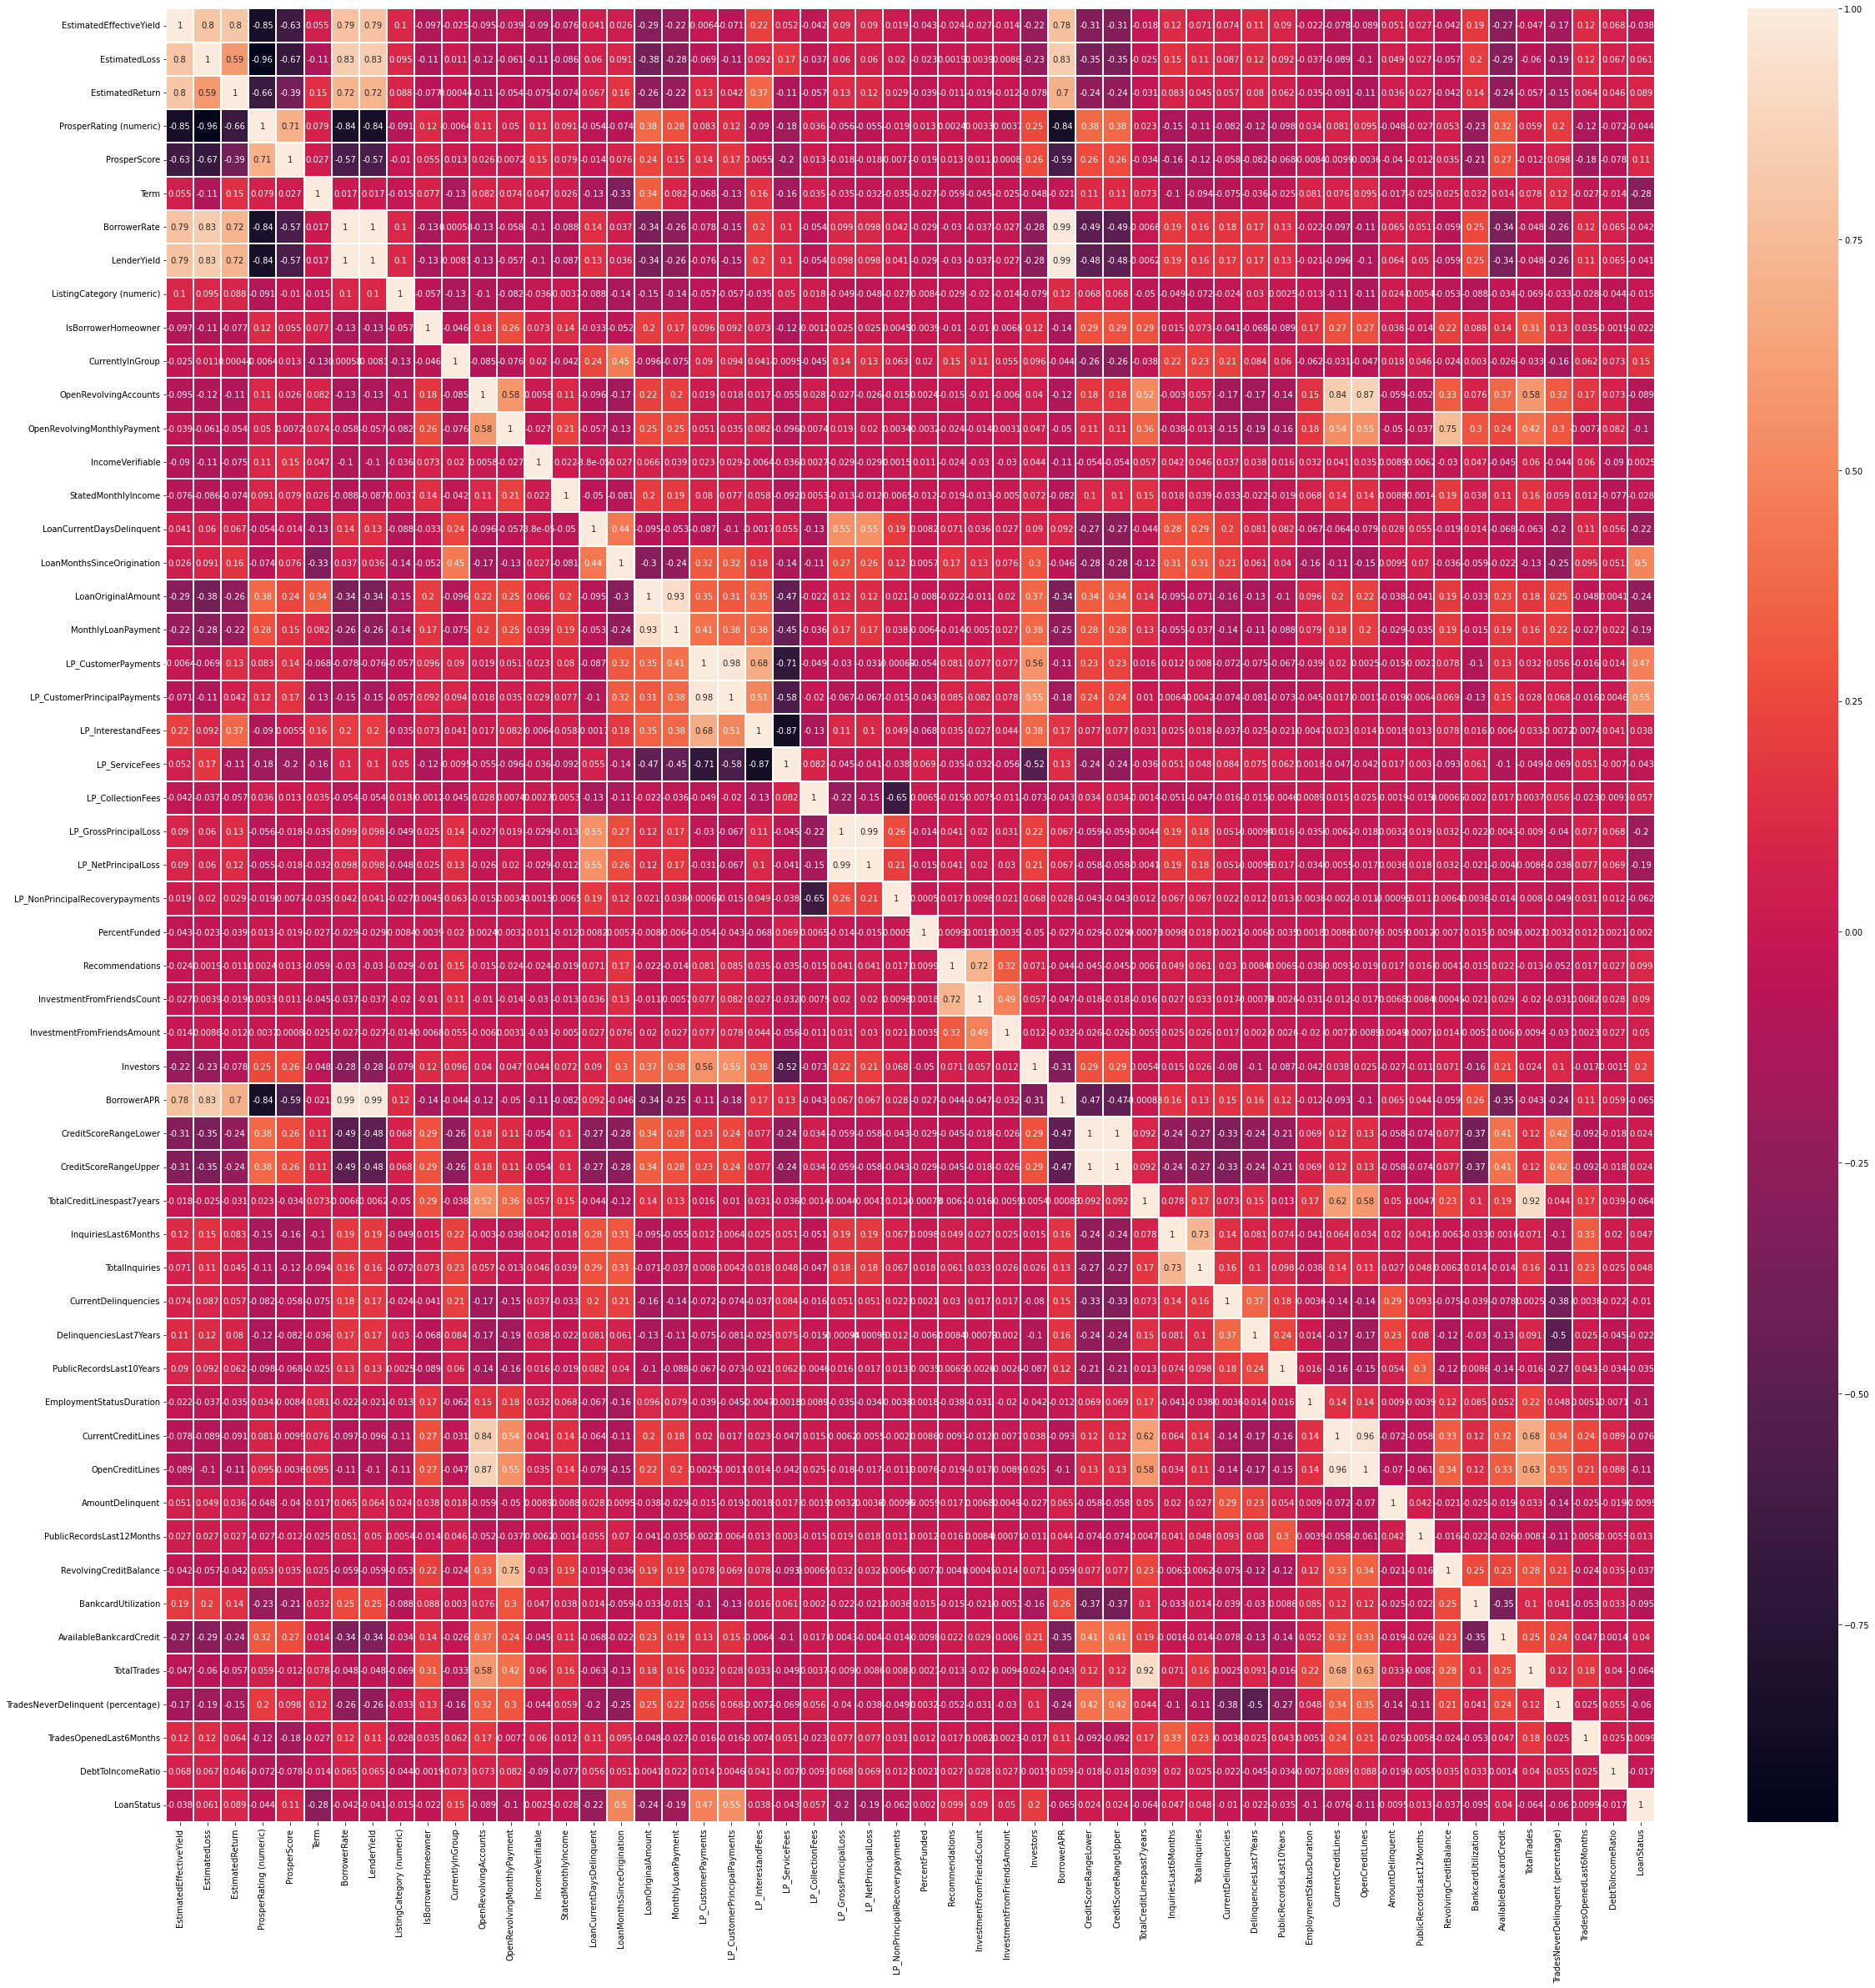

In [17]:
#ploting correlation matrix
fig, ax = plt.subplots(figsize=(40,40))
sns.heatmap(X.merge(pd.DataFrame(y),left_index=True,right_index=True).corr(), annot=True, linewidth=.4, ax=ax)

## 3. Mutual Information

In [18]:
for colname in X.select_dtypes("object"):
    X[colname], _ = X[colname].factorize()
    
# All discrete features should now have integer dtypes
discrete_features = X.dtypes == int

In [19]:
from sklearn.feature_selection import mutual_info_regression

def make_mi_scores(X, y, discrete_features):
    mi_scores = mutual_info_regression(X, y, discrete_features=discrete_features)
    mi_scores = pd.Series(mi_scores, name="MI Scores", index=X.columns)
    mi_scores = mi_scores.sort_values(ascending=False)
    return mi_scores

mi_scores = make_mi_scores(X, y, discrete_features)

In [20]:
#features with their MI scores
print(mi_scores[::])

LP_CustomerPrincipalPayments          0.554635
LP_CustomerPayments                   0.241704
BorrowerAPR                           0.204799
LoanMonthsSinceOrigination            0.199404
EstimatedEffectiveYield               0.195175
EstimatedReturn                       0.187709
EstimatedLoss                         0.172535
BorrowerRate                          0.164826
LenderYield                           0.163529
MonthlyLoanPayment                    0.142609
EmploymentStatus                      0.090287
LP_InterestandFees                    0.079042
ProsperScore                          0.076252
Investors                             0.074478
LP_ServiceFees                        0.073505
LoanCurrentDaysDelinquent             0.067984
ProsperRating (numeric)               0.066029
ProsperRating (Alpha)                 0.062003
LP_NetPrincipalLoss                   0.060189
LoanOriginalAmount                    0.058372
LP_GrossPrincipalLoss                 0.058169
Term         

LP_CustomerPrincipalPayments, LP_CustomerPayments, BorrowerAPR, EstimatedEffectiveYield have the higher mutual information scores

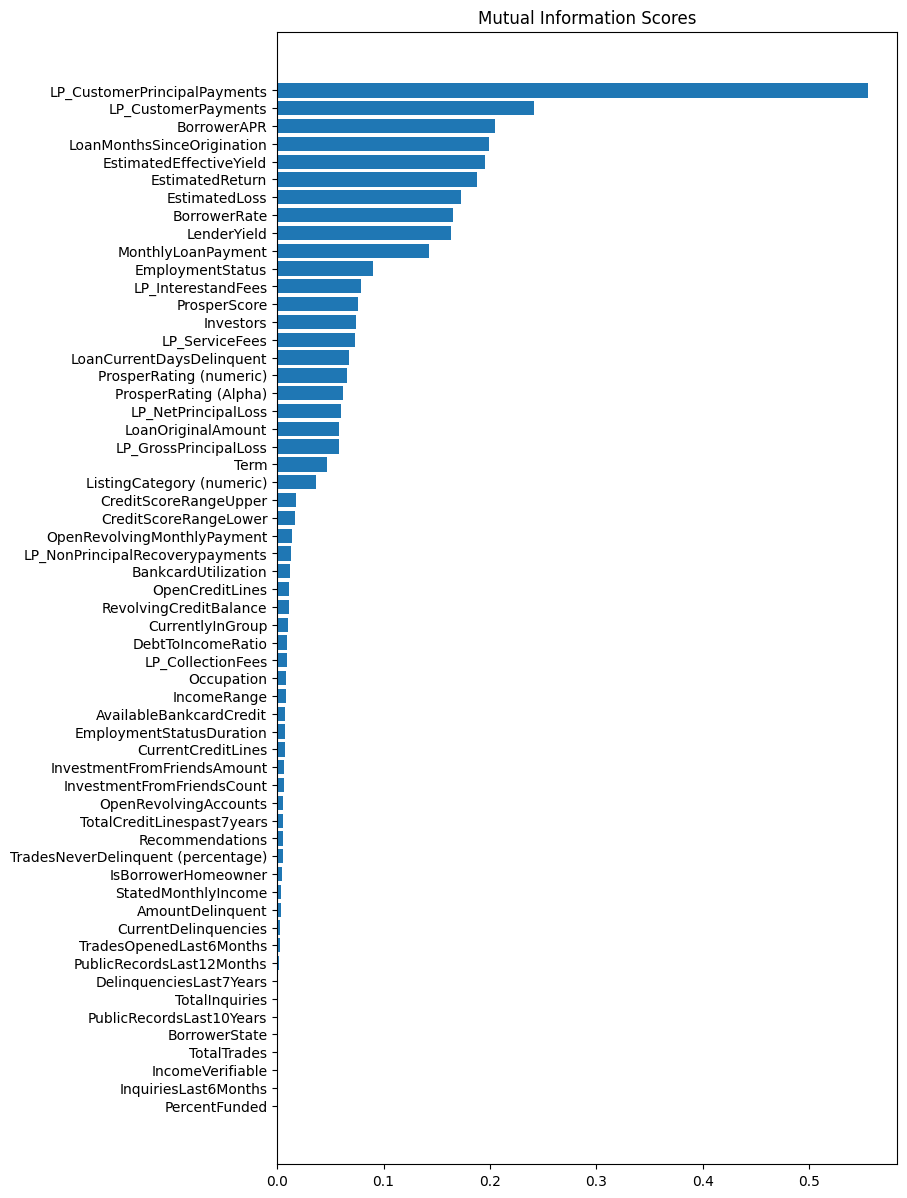

In [21]:
def plot_mi_scores(scores):
    scores = scores.sort_values(ascending=True)
    width = np.arange(len(scores))
    ticks = list(scores.index)
    plt.barh(width, scores)
    plt.yticks(width, ticks)
    plt.title("Mutual Information Scores")

plt.figure(dpi=100, figsize=(8, 15))
plot_mi_scores(mi_scores)

Social profile related features like CurrentlyInGroup, InvestmentFromFriendsCount, InvestmentFromFriendsAmount, Recommendations have lower mutual information scores. 

In [22]:
#selecting the features having mutual information score more than 0.001
High_MI_Score_columns=[s for s in mi_scores.sort_values(ascending=False).index if mi_scores[s]>0.001]

In [23]:
new_dataset=X[High_MI_Score_columns]

## 4. Features Scaling

In [42]:
#Splitting the training and testing data
from sklearn.model_selection import train_test_split
xx=new_dataset
yy=target
X_train, X_test, y_train, y_test = train_test_split(xx, yy, test_size=0.33,random_state=42)

In [43]:
#Applying Standardization
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
scaler.fit(pd.DataFrame(X_train))
X_train_scaled = pd.DataFrame(scaler.transform(pd.DataFrame(X_train)))
X_test_scaled = pd.DataFrame(scaler.transform(pd.DataFrame(X_test)))

## 5. Principle Components Analysis


In [44]:
sp = pd.concat([X_train_scaled,X_test_scaled])

In [49]:
from sklearn.decomposition import PCA
pca = PCA()
principalComponents = pca.fit_transform(sp)

In [50]:
component_names = [f"PC{i+1}" for i in range(principalComponents.shape[1])]
principal_Df = pd.DataFrame(data = principalComponents,columns=component_names)

In [51]:
print('Explained variation per principal component: {}'.format(pca.explained_variance_ratio_))

Explained variation per principal component: [1.66389457e-01 9.08508527e-02 8.82950769e-02 6.63630349e-02
 4.64652005e-02 3.87119049e-02 3.71317243e-02 3.52368453e-02
 3.02950425e-02 2.86557326e-02 2.45155123e-02 2.13755581e-02
 2.09191253e-02 2.04141050e-02 2.02501348e-02 1.99048932e-02
 1.90119600e-02 1.83593822e-02 1.73486456e-02 1.72129506e-02
 1.50983759e-02 1.46212845e-02 1.39586215e-02 1.33802271e-02
 1.16780557e-02 1.12937499e-02 1.02660540e-02 9.41609842e-03
 9.03305954e-03 8.07515999e-03 7.92197098e-03 6.72284409e-03
 6.61288902e-03 6.01219953e-03 5.33755847e-03 5.03331008e-03
 4.90878914e-03 3.93337643e-03 2.91699725e-03 1.86510768e-03
 1.56728349e-03 1.41221485e-03 5.31296329e-04 5.15247814e-04
 9.46450047e-05 7.83275027e-05 8.11728187e-06 3.40565512e-30
 3.31680201e-33]


Principal component 1 contributes to the maximum variance upto 16%.The first 20 principal components describes almost 71% of the information

In [52]:
principal_Df

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,...,PC40,PC41,PC42,PC43,PC44,PC45,PC46,PC47,PC48,PC49
0,-3.162699,-1.935116,0.371369,0.225153,-0.053772,-0.254360,0.064662,-0.117083,-0.333979,-0.266611,...,-0.054200,0.134998,-0.071216,-0.106514,-0.052787,-0.002351,-0.064379,0.000335,3.850382e-12,-8.342098e-16
1,-0.882307,-0.565213,1.342530,1.031666,1.191683,0.574307,0.051403,-0.563575,1.073418,-0.430746,...,0.031107,-0.002513,-0.093548,0.085614,-0.046789,0.003871,0.067628,-0.005627,-1.775227e-12,-1.805718e-15
2,-2.196259,0.169235,1.234430,-0.428089,0.312163,-1.166863,-1.676540,3.014996,-1.809986,0.844652,...,-0.014859,0.062632,0.403292,0.065658,-0.065385,-0.001192,-0.008614,0.005179,1.288198e-16,1.867821e-14
3,0.942104,0.401628,-4.156798,-0.986095,0.612212,-0.452363,-0.694175,1.191445,1.500660,-1.217915,...,-0.181590,0.010309,-0.014939,0.070930,0.052825,-0.009785,-0.016786,-0.002713,9.661449e-17,-1.799015e-15
4,-0.067998,1.111965,0.877270,-3.112577,0.251813,0.575309,0.206764,-0.654454,0.164006,-0.654684,...,-0.325812,0.017447,-0.098272,-0.290426,-0.037094,0.010483,-0.040362,0.005563,-4.735993e-16,5.274434e-16
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
106154,1.706563,6.729698,4.593781,3.390992,0.320947,0.402402,-1.321336,-0.788050,0.456368,-0.058610,...,-0.092393,-0.276426,-0.083779,-0.065354,0.043787,0.000585,-0.029265,0.002090,1.008845e-16,-1.225883e-16
106155,1.963562,-0.029087,-3.684720,-1.567851,0.291764,0.256241,-0.352312,-0.513462,1.507573,-0.501824,...,0.040389,0.055956,0.047490,-0.083537,0.034430,-0.004042,0.042198,-0.000816,1.396850e-16,3.833076e-17
106156,5.441139,-0.921107,-1.506678,-0.655557,-1.336121,0.265316,0.350265,-0.375368,-1.288639,0.328736,...,0.252052,-0.310422,-0.168060,0.096278,-0.044572,-0.002230,-0.085201,0.005197,-9.121915e-17,-7.112402e-17
106157,0.387269,-1.894725,1.640646,0.354684,-0.725369,0.810697,1.391818,-1.772421,-0.378584,-0.362930,...,0.185651,0.027917,0.028577,0.034959,-0.087672,-0.001092,0.018492,0.000590,1.960332e-16,-2.257119e-17


In [53]:
#plotting variance for every feature and principal component
loadings = pd.DataFrame(pca.components_.T, columns=component_names,index=new_dataset.columns)

In [54]:
loadings

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,...,PC40,PC41,PC42,PC43,PC44,PC45,PC46,PC47,PC48,PC49
LP_CustomerPrincipalPayments,0.111961,0.275756,0.113414,-0.230272,0.199683,0.015254,-0.099313,0.033592,0.034277,-0.006069,...,-0.014616,0.082654,-0.000115,0.004432,-0.012857,0.000061,-0.000912,-0.000200,6.365143e-01,0.000000e+00
LP_CustomerPayments,0.098201,0.303221,0.153368,-0.252213,0.171251,0.026107,-0.088520,-0.000195,0.018073,0.012355,...,-0.046492,-0.094147,-0.008790,0.000072,-0.034142,0.003013,0.002322,0.001606,-7.485184e-01,-2.533780e-16
BorrowerAPR,-0.307265,0.000424,0.168687,-0.045902,-0.022009,0.004140,0.009737,0.021338,-0.021171,0.004427,...,0.075189,0.057679,-0.000219,-0.088456,-0.001393,-0.004025,0.813097,-0.051559,8.881784e-16,1.085634e-15
EstimatedEffectiveYield,-0.272631,0.030634,0.183502,-0.089562,-0.024472,-0.061471,-0.011899,0.066664,0.024932,-0.043526,...,0.645401,-0.139642,0.031722,0.044438,-0.013610,0.000063,0.016095,-0.000653,-2.220446e-16,-7.527749e-17
LoanMonthsSinceOrigination,-0.053203,0.344374,-0.178194,0.068286,0.159369,-0.003450,-0.135294,0.069531,0.169287,-0.072619,...,0.321704,0.045952,0.083235,-0.058963,0.045732,-0.003577,0.097683,-0.002000,4.996004e-16,3.534331e-16
EstimatedReturn,-0.229505,0.103232,0.165595,-0.130793,-0.018104,-0.046740,-0.048174,0.041030,0.067634,-0.025777,...,-0.450257,0.164141,-0.014322,0.121827,-0.002372,-0.002014,-0.005993,0.001385,1.110223e-16,-2.657610e-16
EstimatedLoss,-0.292241,0.015119,0.143643,-0.050471,0.024543,-0.080048,-0.010362,0.120306,0.053817,-0.057541,...,-0.257957,0.039499,-0.024522,0.657155,0.054709,-0.000556,0.036217,0.000373,4.163336e-17,-6.019394e-16
LenderYield,-0.309287,0.032055,0.161749,-0.040763,-0.019100,0.001809,0.000250,0.019621,-0.021348,0.001617,...,0.148994,0.018092,0.010170,0.000957,-0.019427,0.002949,-0.438730,-0.682811,-7.285839e-16,-2.062820e-15
BorrowerRate,-0.309581,0.033211,0.159960,-0.038967,-0.018662,0.004399,0.000819,0.016477,-0.023464,0.002705,...,0.152339,0.034643,0.011155,0.000116,-0.009147,-0.001082,-0.353004,0.728572,2.775558e-17,1.285858e-15
MonthlyLoanPayment,0.174034,0.124555,0.212070,-0.047149,-0.169035,0.092791,0.138703,-0.164265,-0.199234,-0.031124,...,0.009407,-0.059265,0.007851,-0.028940,0.660745,0.011133,-0.015262,-0.002344,1.249001e-16,-5.052957e-17


<ipython-input-56-3a945a00ea79>:3: UserWarning: The palette list has more values (10) than needed (2), which may not be intended.
  sns.scatterplot(


<AxesSubplot:xlabel='PC1', ylabel='PC2'>

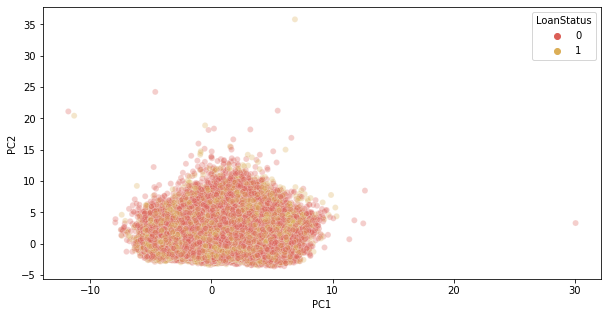

In [56]:
#visualizing the dataset using first 2 principal components
import seaborn as sns
plt.figure(figsize=(10,5))
sns.scatterplot(
    x='PC1', y='PC2',
    hue=y,
    palette=sns.color_palette("hls", 10),
    data=principal_Df,
    legend="full",
    alpha=0.3
)

In [62]:
#for PC1
print("Positive Variance")
positive_Variance_features={loadings["PC1"][i]:i for i in loadings['PC1'].index if loadings['PC1'][i]>0}
positive_Variance_features = sorted(positive_Variance_features.items())
positive_Variance_features

Positive Variance


[(0.001919286083964997, 'Recommendations'),
 (0.005132986094871161, 'InvestmentFromFriendsAmount'),
 (0.006002988447069463, 'Occupation'),
 (0.0065373206241866955, 'InvestmentFromFriendsCount'),
 (0.012051949158100267, 'LP_InterestandFees'),
 (0.018074491363458126, 'LP_CollectionFees'),
 (0.029574583308799928, 'EmploymentStatusDuration'),
 (0.03272162217476636, 'Term'),
 (0.04813908517037253, 'IncomeRange'),
 (0.049207086735512794, 'TotalCreditLinespast7years'),
 (0.06563159360689766, 'RevolvingCreditBalance'),
 (0.06827016650530976, 'TotalTrades'),
 (0.07786615834777372, 'OpenRevolvingMonthlyPayment'),
 (0.0884201562454227, 'OpenCreditLines'),
 (0.09063410068015561, 'IsBorrowerHomeowner'),
 (0.09820147234913845, 'LP_CustomerPayments'),
 (0.10244298372048956, 'StatedMonthlyIncome'),
 (0.11196102519428548, 'LP_CustomerPrincipalPayments'),
 (0.13233856685223971, 'TradesNeverDelinquent (percentage)'),
 (0.14336533285633993, 'Investors'),
 (0.16716397313623807, 'AvailableBankcardCredit'),


(CreditScoreRangeLower, CreditScoreRangeUpper),
(Occupation, InvestmentFromFriendsCount),
(IncomeRange, TotalCreditLinespast7years) varies in similar way

In [63]:
print("Negative Variance")
negative_Variance_features={loadings["PC1"][i]:i for i in loadings['PC1'].index if loadings['PC1'][i]<0}
negative_Variance_features = sorted(negative_Variance_features.items())
negative_Variance_features

Negative Variance


[(-0.3095805545331572, 'BorrowerRate'),
 (-0.30928653843765475, 'LenderYield'),
 (-0.3072646169668608, 'BorrowerAPR'),
 (-0.29224071528192574, 'EstimatedLoss'),
 (-0.27263104820760214, 'EstimatedEffectiveYield'),
 (-0.229505217796982, 'EstimatedReturn'),
 (-0.11442023907794067, 'LP_ServiceFees'),
 (-0.09417667735469416, 'BankcardUtilization'),
 (-0.08279732845726626, 'InquiriesLast6Months'),
 (-0.07222080594801276, 'LoanCurrentDaysDelinquent'),
 (-0.06920434020882708, 'TotalInquiries'),
 (-0.0578868117851874, 'ProsperRating (Alpha)'),
 (-0.05320312344310559, 'LoanMonthsSinceOrigination'),
 (-0.03747993191733359, 'ListingCategory (numeric)'),
 (-0.033994194101031404, 'LP_GrossPrincipalLoss'),
 (-0.033623343922894844, 'LP_NetPrincipalLoss'),
 (-0.031281717851960766, 'EmploymentStatus'),
 (-0.030782295082600244, 'CurrentlyInGroup'),
 (-0.022447298656378182, 'PublicRecordsLast12Months'),
 (-0.019818113193686464, 'DebtToIncomeRatio'),
 (-0.016123002274774458, 'LP_NonPrincipalRecoverypayment

(BorrowerRate, LenderYield, BorrowerAPR), (ProsperRating, LoanMonthsSinceOrigination), (LP_GrossPrincipalLoss, LP_NetPrincipalLoss) varies in similar way


In [64]:
#for PC2
print("Positive Variance")
positive_features={loadings["PC2"][i]:i for i in loadings['PC2'].index if loadings['PC2'][i]>0}
positive_features = sorted(positive_features.items())
positive_features

Positive Variance


[(0.0004235066141506927, 'BorrowerAPR'),
 (0.010633295021201325, 'AvailableBankcardCredit'),
 (0.01320393558065754, 'StatedMonthlyIncome'),
 (0.014450330912672504, 'IsBorrowerHomeowner'),
 (0.015119098898990851, 'EstimatedLoss'),
 (0.018063204385035295, 'RevolvingCreditBalance'),
 (0.030633828735147306, 'EstimatedEffectiveYield'),
 (0.03066327359206589, 'PublicRecordsLast12Months'),
 (0.03205500656651847, 'LenderYield'),
 (0.0332106184473735, 'BorrowerRate'),
 (0.035539945984128796, 'IncomeRange'),
 (0.036375341707097025, 'DebtToIncomeRatio'),
 (0.038327311475669854, 'ProsperScore'),
 (0.07635842329819863, 'InvestmentFromFriendsAmount'),
 (0.0874163401012467, 'LoanOriginalAmount'),
 (0.09389047418538557, 'InvestmentFromFriendsCount'),
 (0.10323243942326671, 'EstimatedReturn'),
 (0.10774309883905293, 'Recommendations'),
 (0.11095385475777911, 'LP_NonPrincipalRecoverypayments'),
 (0.12455498200073632, 'MonthlyLoanPayment'),
 (0.17382124635035975, 'InquiriesLast6Months'),
 (0.176694669448

In [65]:
print("Negative Variance")
negative_features={loadings["PC2"][i]:i for i in loadings['PC2'].index if loadings['PC2'][i]<0}
negative_features = sorted(negative_features.items())
negative_features

Negative Variance


[(-0.2589508041676437, 'LP_ServiceFees'),
 (-0.2243332882611925, 'ProsperRating (Alpha)'),
 (-0.11670857713375077, 'LP_CollectionFees'),
 (-0.08626052421417946, 'TradesNeverDelinquent (percentage)'),
 (-0.08162958018379741, 'ListingCategory (numeric)'),
 (-0.0813468642852845, 'Term'),
 (-0.06679578228786372, 'CreditScoreRangeLower'),
 (-0.062489231515006224, 'EmploymentStatusDuration'),
 (-0.04258511950458243, 'BorrowerState'),
 (-0.03755630665796998, 'OpenCreditLines'),
 (-0.029251711547068255, 'BankcardUtilization'),
 (-0.019647060420896097, 'TotalTrades'),
 (-0.017277797134846413, 'TotalCreditLinespast7years'),
 (-0.013843649431930227, 'OpenRevolvingMonthlyPayment'),
 (-0.010786448828117327, 'Occupation'),
 (-0.010070425130428022, 'ProsperRating (numeric)')]

<AxesSubplot:>

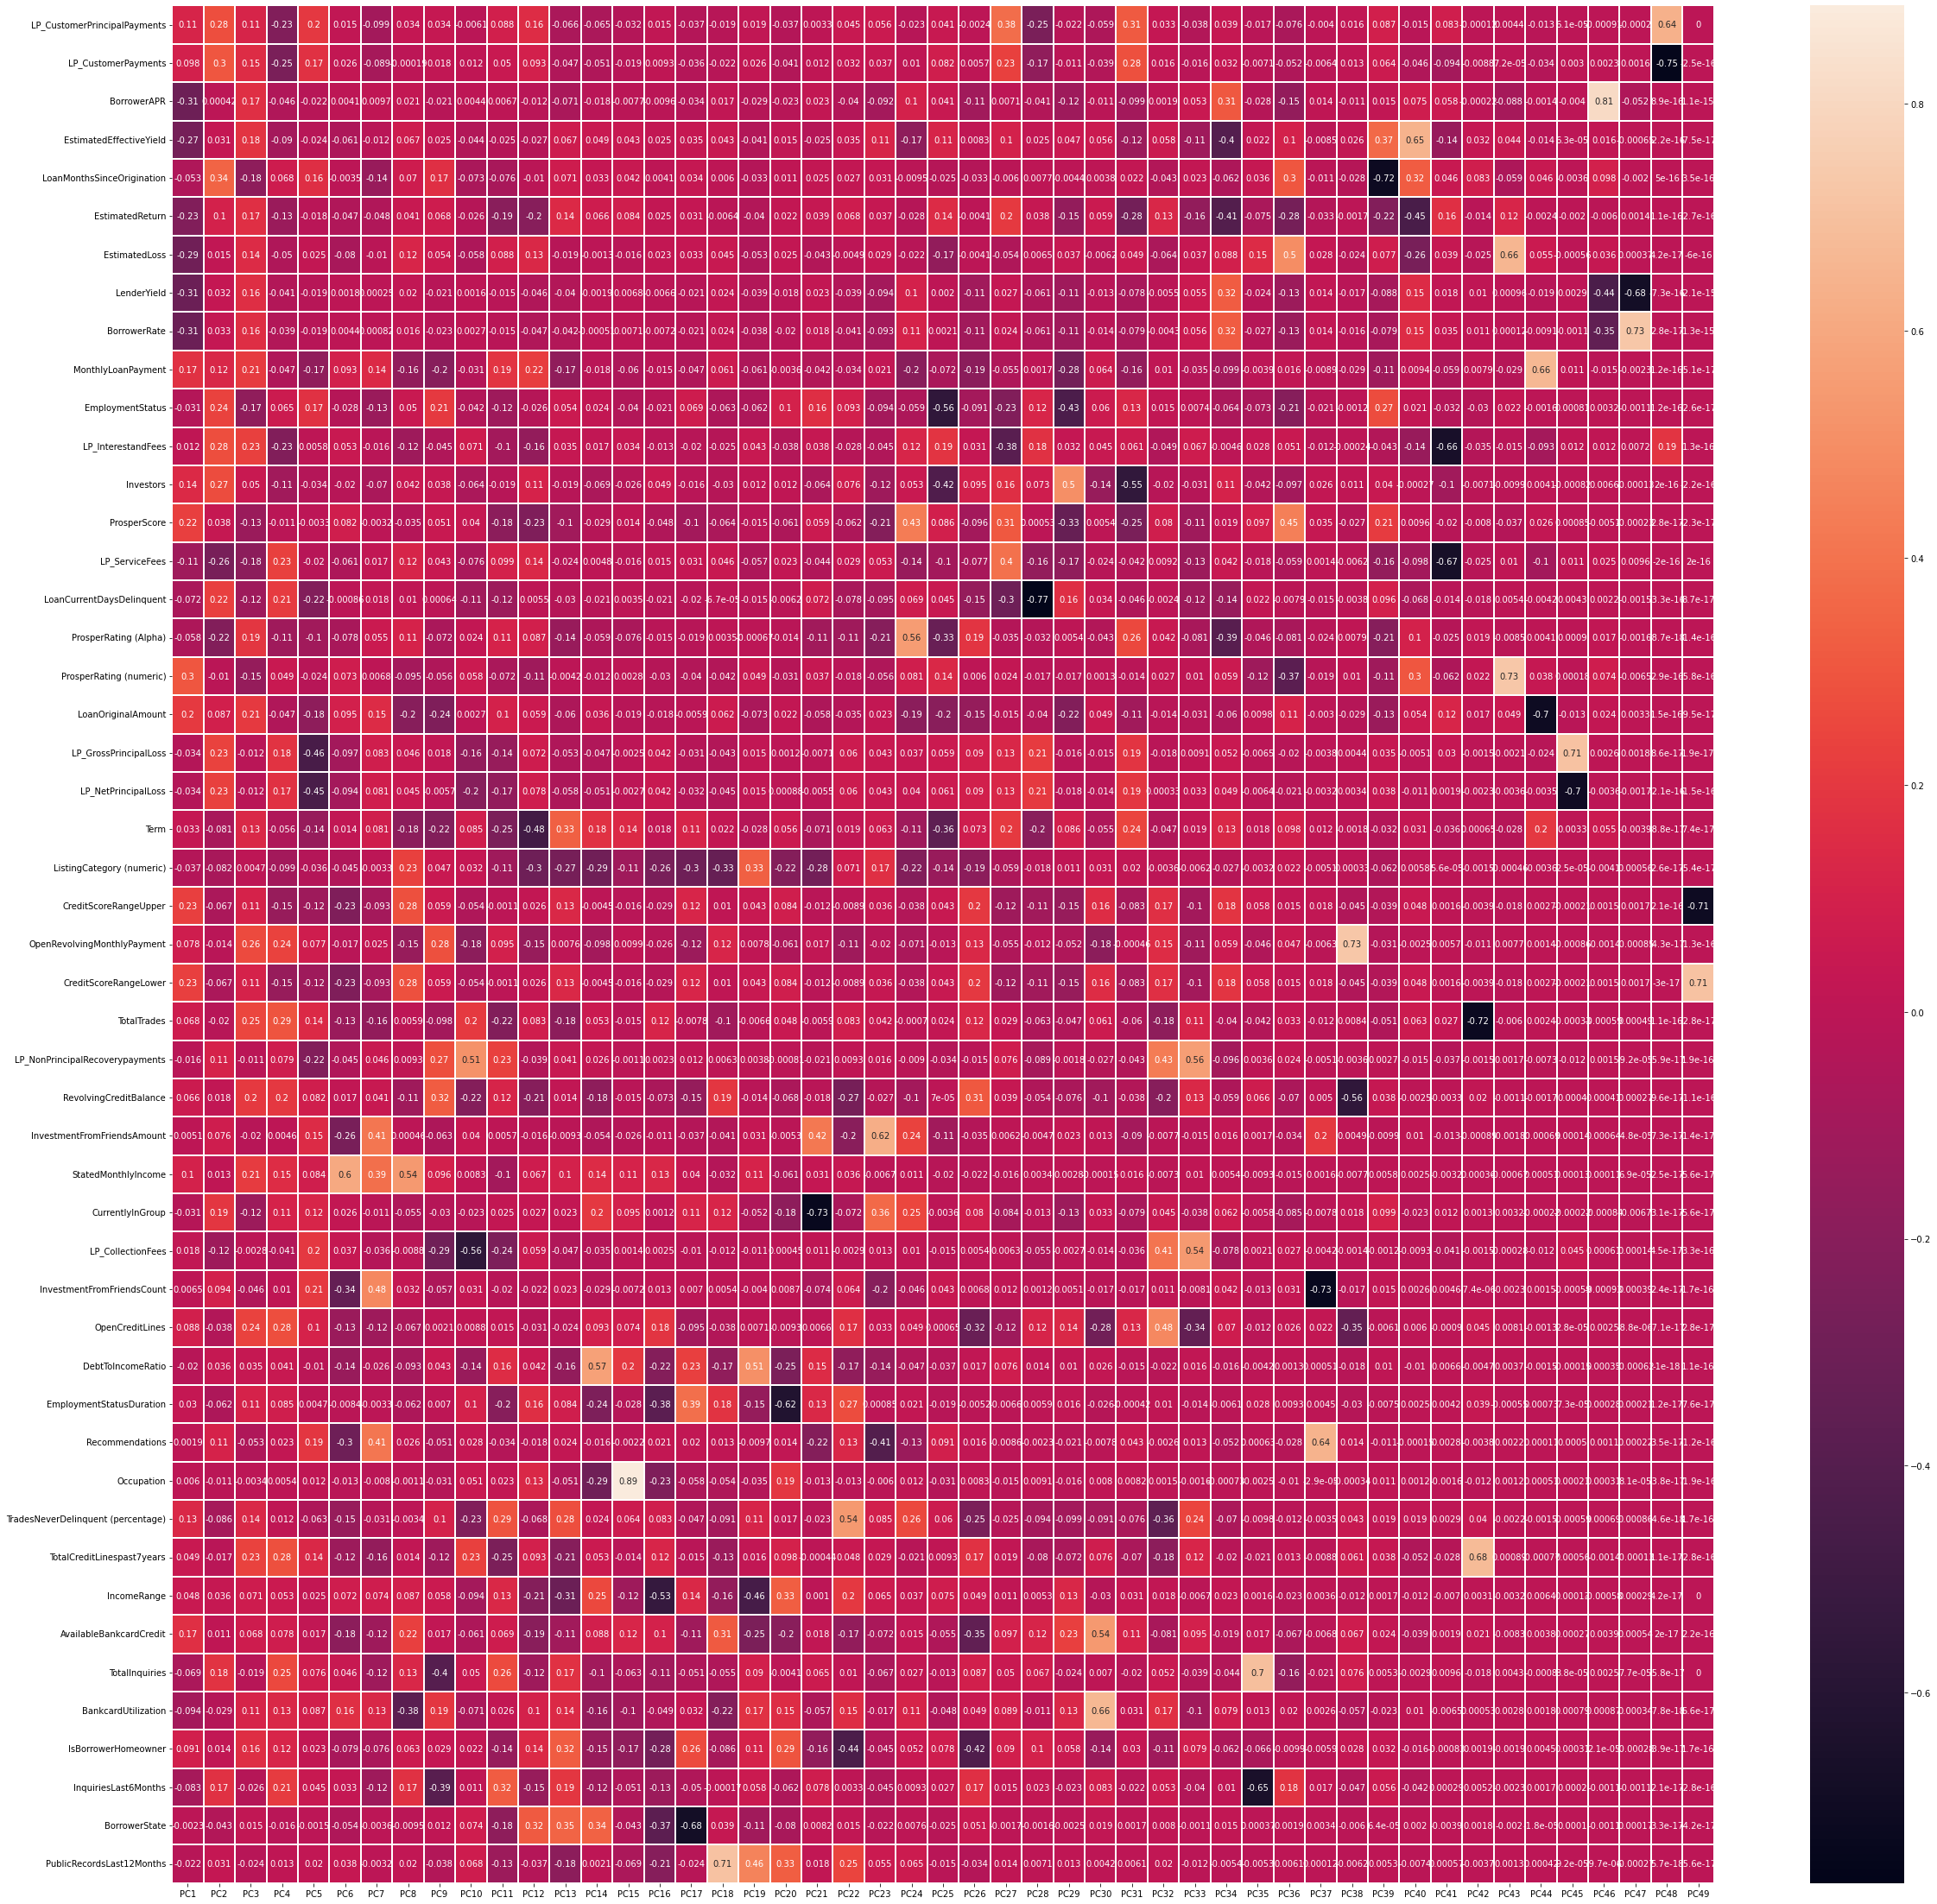

In [66]:
fig, ax = plt.subplots(figsize=(40,40))
sns.heatmap(loadings, annot=True, linewidths=.4, ax=ax)

High variance can observed between the features in first few principal components in the heatmap